In [1]:
from sklearn import datasets
digits=datasets.load_digits()


In [2]:
import pandas as pd

In [3]:
digits.keys()

dict_keys(['data', 'target', 'frame', 'feature_names', 'target_names', 'images', 'DESCR'])

In [4]:
dir(digits)

['DESCR', 'data', 'feature_names', 'frame', 'images', 'target', 'target_names']

In [6]:
digits.data[0]

array([ 0.,  0.,  5., 13.,  9.,  1.,  0.,  0.,  0.,  0., 13., 15., 10.,
       15.,  5.,  0.,  0.,  3., 15.,  2.,  0., 11.,  8.,  0.,  0.,  4.,
       12.,  0.,  0.,  8.,  8.,  0.,  0.,  5.,  8.,  0.,  0.,  9.,  8.,
        0.,  0.,  4., 11.,  0.,  1., 12.,  7.,  0.,  0.,  2., 14.,  5.,
       10., 12.,  0.,  0.,  0.,  0.,  6., 13., 10.,  0.,  0.,  0.])

In [9]:
digits.data[0].reshape(8,8)

array([[ 0.,  0.,  5., 13.,  9.,  1.,  0.,  0.],
       [ 0.,  0., 13., 15., 10., 15.,  5.,  0.],
       [ 0.,  3., 15.,  2.,  0., 11.,  8.,  0.],
       [ 0.,  4., 12.,  0.,  0.,  8.,  8.,  0.],
       [ 0.,  5.,  8.,  0.,  0.,  9.,  8.,  0.],
       [ 0.,  4., 11.,  0.,  1., 12.,  7.,  0.],
       [ 0.,  2., 14.,  5., 10., 12.,  0.,  0.],
       [ 0.,  0.,  6., 13., 10.,  0.,  0.,  0.]])

In [12]:
from matplotlib import pyplot as plt
%matplotlib inline

<Figure size 432x288 with 0 Axes>

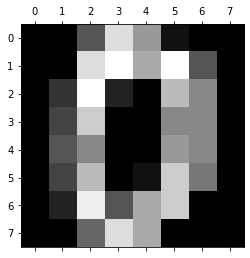

In [16]:
plt.gray()
plt.matshow(digits.data[0].reshape(8,8))

In [17]:
digits.target[0:5]

array([0, 1, 2, 3, 4])

In [21]:
df=pd.DataFrame(data=digits.data,columns=digits.feature_names)

In [22]:
X=df
y=digits.target

In [23]:
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler().fit_transform(X)
scaler


array([[ 0.        , -0.33501649, -0.04308102, ..., -1.14664746,
        -0.5056698 , -0.19600752],
       [ 0.        , -0.33501649, -1.09493684, ...,  0.54856067,
        -0.5056698 , -0.19600752],
       [ 0.        , -0.33501649, -1.09493684, ...,  1.56568555,
         1.6951369 , -0.19600752],
       ...,
       [ 0.        , -0.33501649, -0.88456568, ..., -0.12952258,
        -0.5056698 , -0.19600752],
       [ 0.        , -0.33501649, -0.67419451, ...,  0.8876023 ,
        -0.5056698 , -0.19600752],
       [ 0.        , -0.33501649,  1.00877481, ...,  0.8876023 ,
        -0.26113572, -0.19600752]])

In [24]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(scaler, y, test_size=0.2, random_state=30)

In [25]:
from sklearn.linear_model import LogisticRegression
model=LogisticRegression().fit(X_train,y_train)

In [26]:
model.score(X_test,y_test)

0.9722222222222222

In [32]:
X.shape

(1797, 64)

Use PCA to reduce dimensions

Use components such that 95% of variance is retained

In [51]:
from sklearn.decomposition import PCA
pca=PCA(n_components=0.95)
X_pca=pca.fit_transform(X)
X_pca.shape

(1797, 29)

In [52]:
pca.explained_variance_ratio_

array([0.14890594, 0.13618771, 0.11794594, 0.08409979, 0.05782415,
       0.0491691 , 0.04315987, 0.03661373, 0.03353248, 0.03078806,
       0.02372341, 0.02272697, 0.01821863, 0.01773855, 0.01467101,
       0.01409716, 0.01318589, 0.01248138, 0.01017718, 0.00905617,
       0.00889538, 0.00797123, 0.00767493, 0.00722904, 0.00695889,
       0.00596081, 0.00575615, 0.00515158, 0.0048954 ])

PCA created 29 components out of 64 original columns

In [53]:
X_train_pca, X_test_pca, y_train, y_test = train_test_split(X_pca, y, test_size=0.2, random_state=30)

In [54]:
from sklearn.linear_model import LogisticRegression

model = LogisticRegression(max_iter=1000)
model.fit(X_train_pca, y_train)
model.score(X_test_pca, y_test)

0.9694444444444444

In [55]:
from sklearn.decomposition import PCA
pca=PCA(n_components=2)
X2_pca=pca.fit_transform(X)
X2_pca.shape

(1797, 2)

In [56]:
pca.explained_variance_ratio_

array([0.14890594, 0.13618771])

You can see that both combined retains 0.14+0.13=0.27 or 27% of important feature information

In [57]:
X_train_pca, X_test_pca, y_train, y_test = train_test_split(X2_pca, y, test_size=0.2, random_state=30)

model = LogisticRegression(max_iter=1000)
model.fit(X_train_pca, y_train)
model.score(X_test_pca, y_test)

0.6083333333333333